In [ ]:
# Installing the R language on Collab
!pip install rpy2==3.5.1

In [2]:
%load_ext rpy2.ipython

In [3]:
# Reading the dataset
%%R
data=read.csv('/content/happydata.csv')
# Getting the first six rows of the dataset
head(data)

  infoavail housecost schoolquality policetrust streetquality ëvents happy
1         3         3             3           4             2      4     0
2         3         2             3           5             4      3     0
3         5         3             3           3             3      5     1
4         5         4             3           3             3      5     0
5         5         4             3           3             3      5     0
6         5         5             3           5             5      5     1


Here, we are predicting peoples happiness in terms of four inputs/ independent variable;
house cost, school Quality, Street Quality, and Events


Thus, because our output variable(happy) is a binary column, we will the **logistic regression GLM model** for this prediction.

First, we will input each input feature in variable x1....x4, and then create a new dataframe with the selected input and output variables

In [5]:
%%R
# Specifing the variables for consideration(both input and output varible)
y= data$happy # the dependent variable
x1 = data$housecost
x2 = data$ëvents
x3 = data$schoolquality
x4 = data$streetquality

# Creating a dataframe with the highlighted columns
df=na.omit(data.frame(x1,x2,x3,x4,y))
head(df)

  x1 x2 x3 x4 y
1  3  4  3  2 0
2  2  3  3  4 0
3  3  5  3  3 1
4  4  5  3  3 0
5  4  5  3  3 0
6  5  5  3  5 1


Next, we will split the dataset into train and test set. The test set will be 80% of the data and the test set will be 20% of the data.

To achieve this, we multiply the length of the dataframe by 0.8% and select random samples as our train dataset, while the rest represent our test dataset.

Finally we train our model using the train dataset

In [6]:
%%R
#spliting the dataset
set.seed(32)
n=nrow(df)
indexes = sample(n,n*(80/100)) # the ratio of trainset is 80% and testset is 20%
trainset = df[indexes,]
testset = df[-indexes,]

# Fitting the model with the trained dataset
fit=glm(y~., data= trainset, family='binomial')
coef(fit)

(Intercept)          x1          x2          x3          x4 
-2.27535532  0.05317841  0.10732416  0.16405237  0.35323933 



Here, where alpha is greater than p-value, we consider the independent variable as an important feature, and vice versa.

To get the p-value of each input variable, we will use the summary() function in GLM

In [7]:
%%R
# Getting the summary of the model
summary(fit)


Call:
glm(formula = y ~ ., family = "binomial", data = trainset)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.27536    1.30418  -1.745   0.0810 .
x1           0.05318    0.18541   0.287   0.7743  
x2           0.10732    0.25145   0.427   0.6695  
x3           0.16405    0.21030   0.780   0.4353  
x4           0.35324    0.20048   1.762   0.0781 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 157.16  on 113  degrees of freedom
Residual deviance: 150.61  on 109  degrees of freedom
AIC: 160.61

Number of Fisher Scoring iterations: 4



So far, we can see that none of the p-values for the variables are less than 0.05. Therefore, based on this significance level, none of the columns has a significant impact on our output variable.



Here, we will use the GLM predict() function, and making predictions with the trained model based on the test dataset.

Next, we will create a binary threshold of 0 and 1 for all the predicted results, setting all predicted values above 0.5 as 1 and those below as 0.

Finally, we will create a dataframe to compare predicted values and the actual value.

In [10]:
%%R

# Make predictions on the test set
pred = predict(fit, testset, type = 'response')

# Creating a binary predictions based on a threshold of 0.5
yhat = rep(0, length(pred))
yhat[pred > 0.5] = 1

# Displaying the predicted result and the actual results
Actual = testset$y
result_df = data.frame(Actual,yhat)
head(result_df)

  Actual yhat
1      0    0
2      0    1
3      1    0
4      1    1
5      1    0
6      0    1




Here we will compute the confusion metrics, showing the count of all predicted and actual values using the table() function.

Also, for the probability of correctness, we will compute the accuracy, recall and precision scores.

In [13]:
%%R
# Computing confusion metrics
confusion=table(Actual,yhat)
cat("Confusion Matrix:\n")
print(confusion)

# computing the accuracy of the model
accuracy=mean(yhat==Actual)
cat("Accuracy:", accuracy, "\n")

#compute recall
Recall=confusion[2,2]/(confusion[2,2]+confusion[2,1])
cat("Recall:", Recall, "\n")

#compute Precision
Precision=confusion[2,2]/(confusion[2,2]+confusion[1,2])
cat("Precision:", Precision, "\n")

Confusion Matrix:
      yhat
Actual 0 1
     0 8 6
     1 6 9
Accuracy: 0.5862069 
Recall: 0.6 
Precision: 0.6 




**Use the a particular stock market dataset and apply the following steps to accomplish the time series analysis:**

First we install the necessary libraries

In [ ]:
%%R
# Install and load necessary libraries
install.packages(c("tseries", "forecast"))

In [ ]:
%%R
# Loading the packages
library(tseries)
library(forecast)

Next, we will read the data.



For this assessment we will be focusing on the Amazon stock data from yahoo finance, and particularly, we will be focusing on predicting the stock closing prices from April 2021 to todays date.

First, we check for stationarity in the chosen data.

In [18]:
%%R
# Reading the Amazon stock data from yahoo finance
library(TTR); library(quantmod)
data=getSymbols('AMZN', src='yahoo', from='2021-04-17',auto.assign = FALSE)
head(data);

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2021-04-19  169.5165  171.7965 168.0080   168.6005    54508000      168.6005
2021-04-20  168.6800  169.1495 165.8000   166.7345    52460000      166.7345
2021-04-21  165.8000  168.1430 165.1905   168.1010    44224000      168.1010
2021-04-22  168.5840  168.6435 165.0725   165.4520    51612000      165.4520
2021-04-23  165.9550  168.7500 165.4250   167.0440    63856000      167.0440
2021-04-26  167.4000  171.4225 166.5470   170.4500    97614000      170.4500


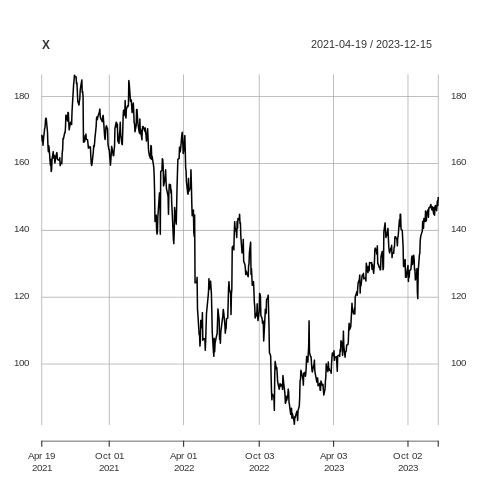

In [21]:
%%R
# Checking for stationarity in the data
X=data$AMZN.Close

plot(X)  # time series


From the graph above, we can tell that the data is non-stationary. In order to make the data stationary in mean, we use diff()

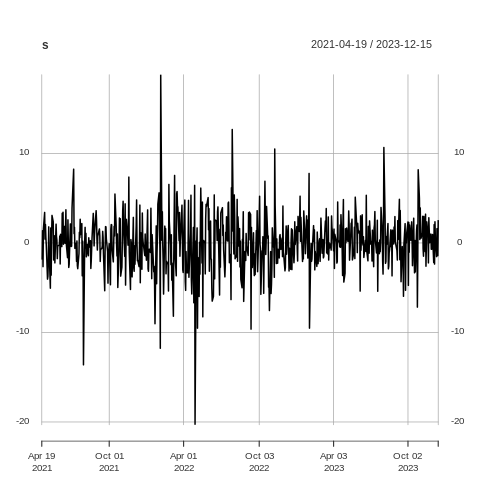

In [22]:
%%R
# Making the dataset stationary in mean
s=diff(X)
plot(s)  # time series

We have now successfully made the data stationary mean, and it also looks stationary in variance.

### b)	Use acf() and pacf() functions to identify the order of AR and MA.

Here, we first handle all the missing values and na values in our dataset. Then we proceed to plotting the acf and pacf charts

In [28]:
%%R
# Identifying missing values in the dataset
any(is.na(s))

# Removing na/missing values in the dataset
s = na.omit(s)

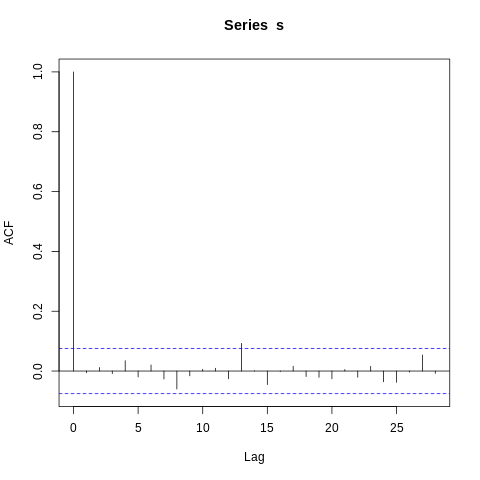

In [30]:
%%R
# Identifying the acf
acf(s)

Based on the acf plot, the order of MA is q=1 since only one initial lags are outside of the bounds.

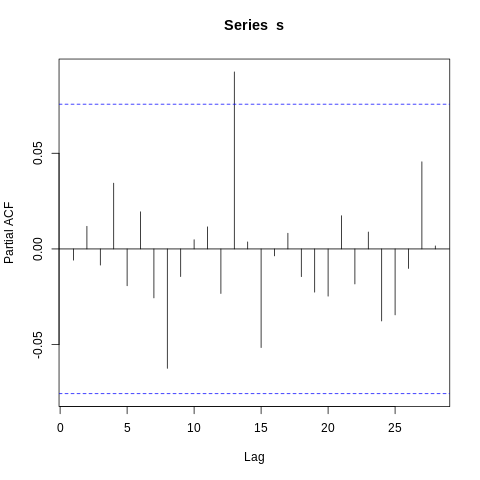

In [31]:
%%R
# Identifying the pacf
pacf(s)

Based on the pacf plot, the order of AR is p=0 since no initial lags are outside of the bounds.

            

In [36]:
%%R
# Learning the best Seasonal ARIMA MODEL
seasonal = auto.arima(X, seasonal=T)
seasonal

Series: X 
ARIMA(0,1,0) 

sigma^2 = 9.848:  log likelihood = -1719.5
AIC=3441   AICc=3441   BIC=3445.51


In [35]:
%%R
# Learning the best non-seasonal ARIMA MODEL
non_seasonal = auto.arima(X, seasonal=F)
non_seasonal

Series: X 
ARIMA(0,1,0) 

sigma^2 = 9.848:  log likelihood = -1719.5
AIC=3441   AICc=3441   BIC=3445.51


Here, we note that in the best model, p = 0 and q = 0. Since the AIC for both the seasonal and non-seasonal are similar, both provide the best model for making predictions.



Here, we will use the seasonal model for our future forcast.

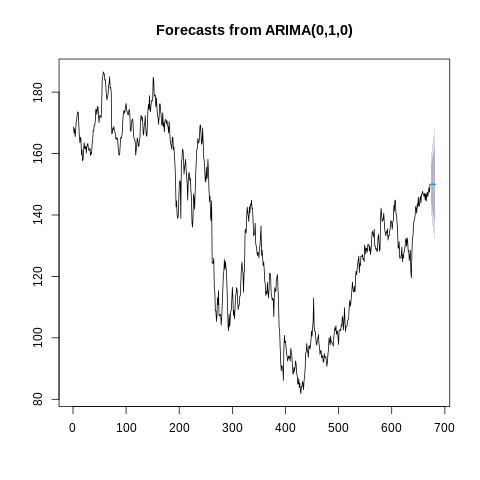

In [38]:
%%R
# Making 10 extra month predictions
predictions = forecast(seasonal, h=10)

# Plotting the first predictions
plot(predictions)

In [39]:
%%R
# Displaying the actual predictions
predictions

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
673         149.97 145.9482 153.9918 143.8192 156.1208
674         149.97 144.2823 155.6577 141.2715 158.6685
675         149.97 143.0041 156.9359 139.3165 160.6235
676         149.97 141.9264 158.0136 137.6684 162.2716
677         149.97 140.9770 158.9630 136.2164 163.7236
678         149.97 140.1187 159.8213 134.9037 165.0363
679         149.97 139.3293 160.6107 133.6965 166.2435
680         149.97 138.5947 161.3453 132.5729 167.3671
681         149.97 137.9046 162.0354 131.5176 168.4224
682         149.97 137.2520 162.6880 130.5195 169.4205
